In [242]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

In [243]:
%matplotlib inline

def plotNumber(number):
    # We'll show the image and its pixel value histogram side-by-side.
    _, (ax1, ax2) = plt.subplots(1, 2)

    # To interpret the values as a 28x28 image, we need to reshape
    # the numpy array, which is one dimensional.
    ax1.imshow(np.asarray(number).reshape(28, 28), cmap=plt.cm.Greys);

    ax2.hist(number, bins=20, range=[0,1]);

In [244]:
from keras.datasets import mnist

In [168]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [169]:
train_images.shape

(60000, 28, 28)

In [170]:
len(train_labels)

60000

In [171]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [172]:
test_images.shape

(10000, 28, 28)

In [173]:
len(test_labels)

10000

In [174]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [175]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [176]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [177]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [178]:
train_images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [179]:
test_images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [180]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [181]:
train_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [182]:
test_labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [183]:
train_labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [184]:
network.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.2615 - acc: 0.9234
Epoch 2/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1049 - acc: 0.9687
Epoch 3/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0683 - acc: 0.9790
Epoch 4/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0493 - acc: 0.9853
Epoch 5/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.0373 - acc: 0.9886
Epoch 6/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0287 - acc: 0.9911
Epoch 7/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.0223 - acc: 0.9935
Epoch 8/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0176 - acc: 0.9948
Epoch 9/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0132 - acc: 0.9964
Epoch 10/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.0100 - a

60000/60000 [==============================] - 3s 46us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 79/100
60000/60000 [==============================] - 3s 47us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 80/100
60000/60000 [==============================] - 3s 48us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 81/100
60000/60000 [==============================] - 3s 43us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 82/100
60000/60000 [==============================] - 3s 50us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 83/100
60000/60000 [==============================] - 3s 52us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 84/100
60000/60000 [==============================] - 3s 51us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 85/100
60000/60000 [==============================] - 3s 48us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 86/100
60000/60000 [==============================] - 3s 47us/step - loss: 2.6875e-04 - acc: 1.0000
Epoch 87/100
60000/60000 [==============================] -

In [185]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 62us/step
('test_acc:', 0.98350000000000004)


In [186]:
test_labels.ndim

2

In [187]:
test_labels.shape

(10000, 10)

In [188]:
imageIndex = 99
size=14
size=28

In [189]:
digit = train_images[imageIndex].reshape(1,28,28)[:, 7:-7, 7:-7]

In [190]:
digit = train_images[imageIndex].reshape(1,28,28)
digit.shape

(1, 28, 28)

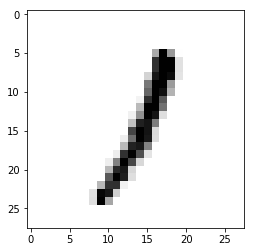

In [191]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.asarray(digit).reshape(size, size), cmap=plt.cm.binary)
plt.show()

In [192]:
rob = np.asarray([train_images[imageIndex]])

In [193]:
rob.shape

(1, 784)

In [194]:
result = network.predict(rob)

In [195]:
result

array([[  6.10471502e-33,   1.00000000e+00,   1.08992193e-21,
          8.52036436e-24,   9.16892307e-16,   1.29903087e-32,
          2.93012171e-35,   1.28078090e-13,   5.46331921e-20,
          1.05550021e-25]], dtype=float32)

In [196]:
np.argmax(result, axis=None, out=None)

1

In [245]:
t1 = imageprepare("my-1.png")
t2 = imageprepare("my-2.png")
t8 = imageprepare("my-8.png")

In [246]:
t1_ready = np.asarray([t1])
t2_ready = np.asarray([t2])
t8_ready = np.asarray([t8])

In [247]:
t1_result = network.predict(t1_ready)
t2_result = network.predict(t2_ready)
t8_result = network.predict(t8_ready)

In [248]:
t1_result

array([[  5.20453563e-18,   9.88194823e-01,   3.45139646e-11,
          3.44481978e-11,   4.24241839e-14,   1.59785041e-13,
          1.33318010e-22,   5.65531511e-10,   4.77060936e-13,
          1.18051795e-02]], dtype=float32)

In [249]:
t2_result

array([[  8.44773350e-33,   5.94560954e-24,   1.00000000e+00,
          1.55972279e-29,   1.43844044e-38,   6.09975540e-26,
          3.89288969e-34,   1.40285101e-19,   7.95144191e-29,
          0.00000000e+00]], dtype=float32)

In [250]:
t8_result

array([[  2.50019699e-10,   5.01413623e-19,   6.34598693e-11,
          1.76803288e-13,   7.48191553e-09,   2.66634190e-04,
          7.42292339e-10,   2.21412081e-19,   9.99733388e-01,
          6.62374344e-13]], dtype=float32)

In [251]:
np.argmax(t1_result, axis=None, out=None)

1

In [252]:
np.argmax(t2_result)

2

In [253]:
np.argmax(t8_result)

8

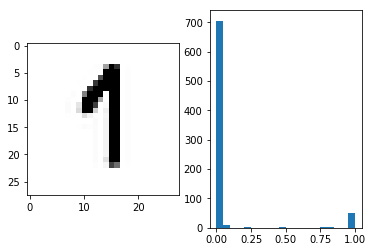

In [254]:
plotNumber(t1)

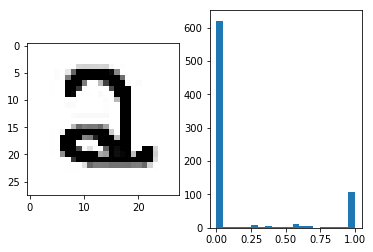

In [255]:
plotNumber(t2)

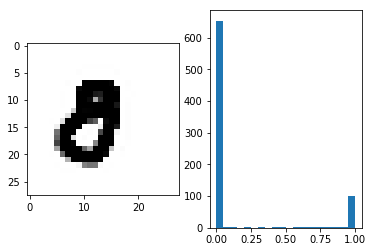

In [256]:
plotNumber(t8)